In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from itertools import  count
import glob 

In [2]:
import os
file_map=[]
path = 'C:\\Users\\upend\\Desktop\\data\\*csv'   
files=glob.glob(path)
data_frame = None
for file in files:     
    df = pd.read_csv(file, header=None)
    data_frame = pd.concat([data_frame,df], axis=0)
    file_map.append(file)

In [3]:
data_frame.head()

,0,1
0,2018-06-13 07:00:00,2991
1,2018-06-13 07:01:00,2980
2,2018-06-13 07:02:00,2903
3,2018-06-13 07:03:00,2937
4,2018-06-13 07:04:00,2867


In [4]:
clicks = data_frame[1].values

In [5]:
timestamp = data_frame[0].values

In [6]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


In [7]:
def detect_anomalies(y, window_size, sigma=1.0):
  
    average = moving_average(y, window_size).tolist()
    
    residual = y - average
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    order_dict = collections.OrderedDict()
    for index, val, avg_val in zip(count(), y, average):
        if (np.abs(val-avg_val)) >= (sigma*std):
            order_dict[index] = val
    return order_dict



In [8]:

def plot_results(x, y, window_size, sigma=1,):
  
    plt.figure(figsize=(20, 15))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, len(y))
    ordered_dict = detect_anomalies(y,window_size, sigma)
    x_anomaly = np.fromiter(ordered_dict.keys(), dtype=int, count=len(ordered_dict))
    y_anomaly = np.fromiter(ordered_dict.values(), dtype=float,count=len(ordered_dict))

    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

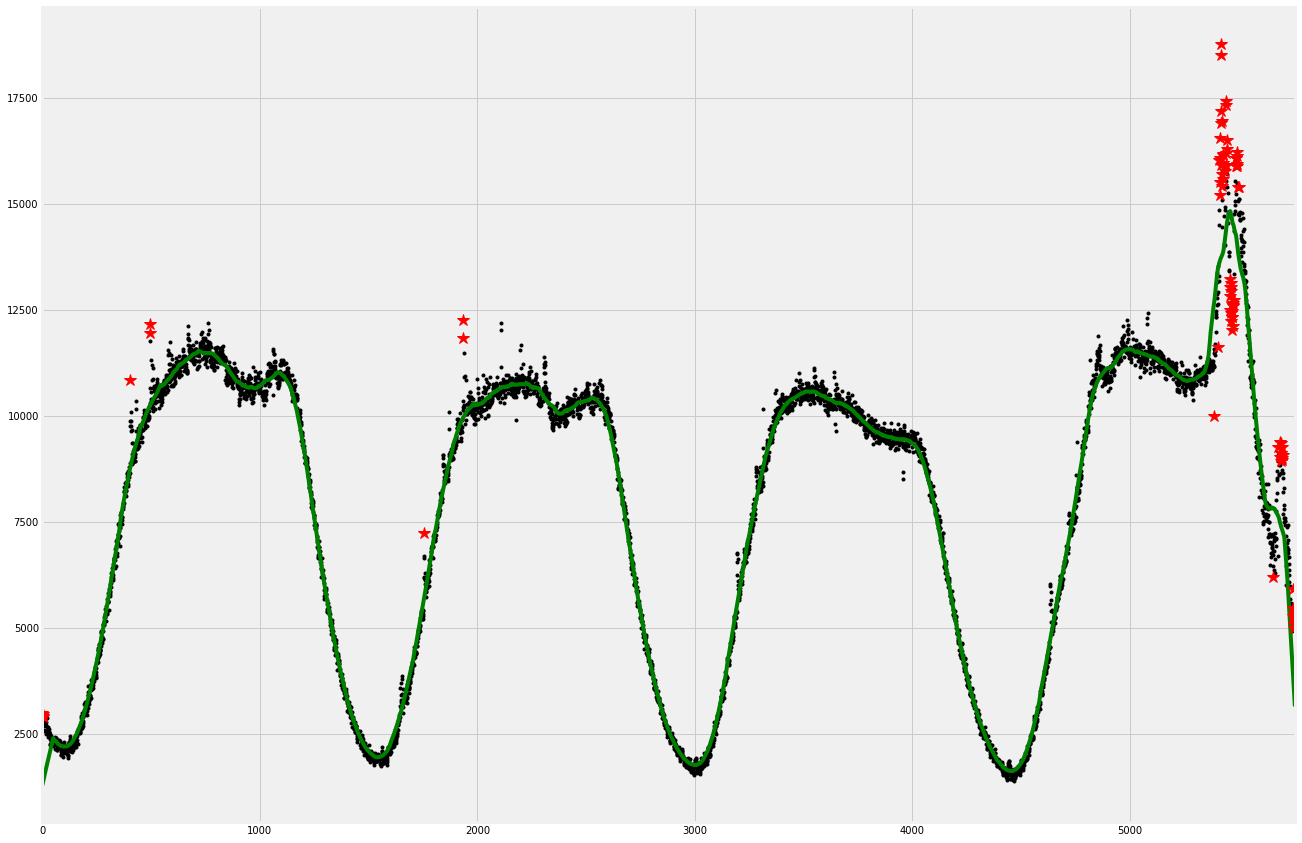

In [9]:
window_size = 100
sigma = 4
X = np.asarray([i for  i in range(len(clicks))])
plot_results(X, y=clicks, window_size=window_size, sigma=sigma)
anomalies = detect_anomalies(clicks,window_size, sigma)

In [10]:
# Remove noise from data

In [11]:
i =0
arr = list(anomalies.keys())
index = -1
res = []
while i < len(arr)-1:
    pre = arr[i]
    nex = arr[i+1]
    if nex == pre +1:
        if index == -1:
            index = i
        i = i+1
    else:
        if i -index>5:
            j = index
            while j< i:
                res.append(arr[j])
                j = j+1
        i = i+1
        index = i

        

In [12]:
minutes_in_day = 60*24

In [13]:
#Build anomaly result per day

In [14]:
res_arr =[[],[],[],[]]
for i in res:
    index = (int)(i/minutes_in_day)
    res_arr[index].append("Timestamp:{}, Value:{}".format(timestamp[i],anomalies[i]))
        

In [15]:
#Print result per day

In [16]:
i =0
while i <len(res_arr):
    if len(res_arr[i]) == 0:
        print ("{} : No anomalies".format(file_map[i]))
    else:
        print ("{} : {}".format(file_map[i], res_arr[i]))
    i = i+1

C:\Users\upend\Desktop\data\June13_data.csv : No anomalies
C:\Users\upend\Desktop\data\June14_data.csv : No anomalies
C:\Users\upend\Desktop\data\June16_data.csv : No anomalies
C:\Users\upend\Desktop\data\June17_data.csv : ['Timestamp:2018-06-18 01:12:00, Value:16032', 'Timestamp:2018-06-18 01:13:00, Value:16553', 'Timestamp:2018-06-18 01:14:00, Value:16085', 'Timestamp:2018-06-18 01:15:00, Value:15224', 'Timestamp:2018-06-18 01:16:00, Value:15509', 'Timestamp:2018-06-18 01:17:00, Value:16915', 'Timestamp:2018-06-18 01:18:00, Value:18774', 'Timestamp:2018-06-18 01:19:00, Value:18525', 'Timestamp:2018-06-18 01:20:00, Value:17197', 'Timestamp:2018-06-18 01:21:00, Value:15920', 'Timestamp:2018-06-18 01:22:00, Value:16947', 'Timestamp:2018-06-18 01:59:00, Value:13043', 'Timestamp:2018-06-18 02:00:00, Value:13229', 'Timestamp:2018-06-18 02:01:00, Value:12838', 'Timestamp:2018-06-18 02:02:00, Value:12497', 'Timestamp:2018-06-18 02:03:00, Value:12944', 'Timestamp:2018-06-18 02:04:00, Value:13